<center><span style="font-size:40px;"><b>REINFORCEMENT LEARNING</b></span></center>

In [1]:
from IPython.display import Image, display

---

---

---

# 00 - INTRODUCTION

In traditional **Machine Learning**, solutions typically rely on a *supervisor* that provides labeled and meaningful data describing the phenomenon of interest. However, this approach is not always feasible. In many real-world situations, data cannot be pre-collected or labeled easily.  

**Reinforcement Learning (RL)** addresses this challenge by focusing on scenarios where data must be gathered *through interaction*. The agent explores and interacts with its environment—often without explicit instructions or prior knowledge—and learns how to make decisions that maximize a certain objective, typically expressed as a cumulative reward.  
Examples of RL: self-driving cars, algorithms to play chess...


### LIMITS OF SUPERVISED LEARNING

Supervised learning, though powerful, faces several limitations when applied to dynamic or interactive environments:

- Data may only become available through interaction with the world.
- Collected information is often indirect, providing only partial feedback on performance in the form of rewards rather than explicit labels.
- Time dependency matters: data points are not necessarily independent and identically distributed (i.i.d.), meaning that the order of events affects learning.
- Many supervised learning approaches fail to consider long-term consequences of actions, focusing instead on immediate outcomes.


### RL ELEMENTS

Reinforcement Learning formalizes the learning process through a set of well-defined elements:

> - **Agent**: the decision-maker attempting to solve a task.
> - **States**: all possible situations or configurations in which the agent may find itself.
> - **Actions**: the set of possible moves or decisions the agent can take (which may depend on the current state).
> - **Environment**: the external system the agent interacts with. It provides **rewards** in response to the agent’s actions and determines state transitions.
> - **Rewards**: feedback signals that indicate how good or bad an action was, guiding the agent toward its goal.
> - The agent may prioritize **long-term rewards** (maximizing future gains) rather than short-term ones.



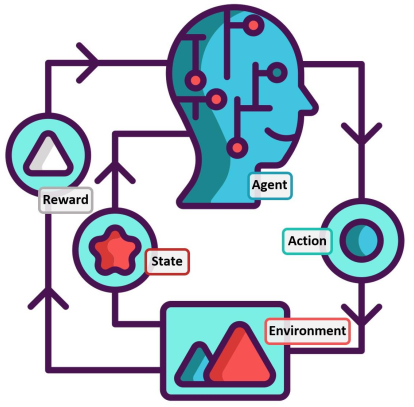

In [3]:
display(Image("./images/RL_elements.png", width=300))

### RL FEATURES

In Reinforcement Learning (RL), the **model of the environment is not known in advance**.  
Instead, the agent must **learn about the environment by interacting** with it and observing the outcomes of its actions.

The agent’s objective is not to perform optimally at every single step, but rather to **maximize long-term rewards** over time.  
This introduces the concept of **planning**, which is central to RL: decisions at each stage must account for their future impact.

For example, in chess, the *true* reward is obtained only at the end of the game (winning or losing). During play, even actions that seem negative—like sacrificing a piece—can be *optimal* if they lead to a better position and ultimately to victory.


Reinforcement Learning can be understood as both:
- a research area, which is a subfield of Machine Learning, and  
- a learning paradigm, focused on teaching an agent how to control a system with many unknown elements in order to maximize a numerical performance measure (the reward).

Unlike other paradigms, RL does not rely on pre-collected historical data. Instead, it **focuses on learning through direct interaction with the environment** rather than from fixed datasets and it focuses on achieving **long-term objectives**, not just immediate rewards.  

Examples of reinforcement Learning: Chatbots and dialogue systems; Autonomous agents (self-driving cars, drones, robots); Games (chess, Go, video games); HVAC systems for energy optimization; Trading and portfolio management; Online advertising and recommender systems; Healthcare and biological systems.

---

## 0.1 - MORE ON THE ELEMENTS

### REWARDS

A **reward** $R_t$ is a scalar feedback signal that measures how well the agent is performing at a given time step $t$.  
Here, a *time step* represents a discrete point in the interaction sequence between the agent and the environment. While continuous-time RL formulations exist, they are beyond the scope of this notebook. The **agent’s objective** is to maximize the **cumulative reward**, which is the sum—or sometimes a discounted sum—of all rewards collected over time. Actions may have long-term consequences, and rewards can be delayed rather than immediate. To achieve long-term success, the agent may need to sacrifice short-term rewards in favor of larger future gains. This is a trade-off.

We distinguish between two main types of tasks:

1. **Episodic tasks** – These have a clear beginning and end (e.g., games). Here the agent aims to maximize the total reward accumulated within an episode.
2. **Continuous tasks** – These go on indefinitely (e.g., controlling a data center or an industrial process). Here the agent focuses on maximizing rewards over a defined or rolling time horizon.

Reinforcement Learning is founded on the **reward hypothesis**, which states:

> *All goals can be represented as the maximization of the expected cumulative reward.*

### LINK BETWEEN AGENT, ACTIONS AND ENVIRONMENT

At each discrete time step $t$, the **agent** (the entity we control or program):

- Is in a **state** $S_t$, representing a complete description of the system (agent + environment) at time $t$;  
- Executes an **action** $A_t$, which must be feasible given $S_t$.

The **environment**, in response to the pair $(S_t, A_t)$:

- Provides a **reward** $R_{t+1}$;  
- Transitions the agent to a **new state** $S_{t+1}$.

This continuous interaction between agent and environment defines the feedback loop at the core of RL.

Technically, at each step, the agent receives an observation $O_{t+1}$ that represents partial or full information about the new state.

- In fully observable environments (like a chess board), we have $S_{t+1} = O_{t+1}$.  
- In partially observable environments (like dutring a poker game), the true state is not directly available and must be inferred from the history $H_t$, and the state can be represented as a function of this history:

$$H_t = (O_1, R_1, A_1, \dots, A_{t-1}, O_t, R_t), \quad \quad S_t = f(H_t)$$

When the state can be estimated reliably, the learning process becomes simpler.  
Otherwise, alternative strategies are required, such as:
- treating the entire history as the state, or  
- using supervised learning models to approximate the hidden state.

### COMPONENTS OF AN AGENT

A RL agent can be described through several components:

- **Policy ($\pi$):** defines the agent’s behavior, mapping states to actions. This is the fundamental and really needed element.
- **Value function ($V$):** estimates how *good* it is to be in a particular state.  
- **Action-value function ($Q$):** estimates how *good* a given state–action pair is.  
- **Model:** represents the agent’s internal understanding of the environment’s dynamics.

### POLICY

The policy is the core of a RL agent, defining how it selects actions based on the current state.  
**The ultimate goal of RL is to discover the optimal policy $\pi$ — the one that maximizes expected cumulative rewards**.

Policies can take two main forms:

- Deterministic policy:  
  $$a = \pi(s), \quad  \quad \quad \textit{with a=action and s=state}$$  
- Stochastic policy: defines a probability distribution over possible actions for each state.
  $$\pi(a|s) = \mathbb{P}[A_t = a \,|\, S_t = s]$$  

---

---

---

---

# 01 - MULTI-ARMED BANDITS

### 1.1 INTRODUCTION

The multi-armed bandit (or k-armed bandit) is a simple problem that captures the fundamental challenge of learning from experience while balancing exploration and exploitation.

A one-armed bandit is represented by the classic slot machine found in casinos.  
- The term "one-armed" refers to the single lever (or arm) that a player can pull after inserting a coin.  
- When pulled, the machine provides a reward (money), which may often be zero.  
- The term "bandit" comes from the fact that, in the long run, such machines tend to take more money than they give back.

Now imagine we have infinite coins and can play as many times as we want.  
Our goal is to learn how to maximize the total amount of money won by deciding how to act over many plays.

In the multi-armed bandit setting case, we have $k$ levers (actions) instead of just one. Each lever corresponds to a different slot machine, and each machine provides rewards following a different probability distribution — some are more generous than others.

At each episode (or play):
- The agent chooses one of the $k$ levers to pull.  
- It receives a stochastic reward, sampled from the lever’s reward distribution.  
- Over time, the agent must decide which lever to pull in order to maximize the cumulative reward.

This is an episodic task, as each play (episode) is independent from the previous ones.

#### EXAMPLE CLINICAL TRIALS

A simple analogy comes from clinical trials. A doctor wants to find the most effective treatment among several possible ones. Each patient represents an episode. Administering a treatment corresponds to choosing an action. The outcome of the treatment (e.g., recovery success) serves as the reward.

After a few patients, one treatment may appear more effective. But for the next patient, should the doctor:
- continue using the best-known treatment (exploitation), or  
- try a different one that might be even better (exploration)?

This lead us to the exploration–exploitation dilemma.

### EXPLORATION-EXPLOITATION TRADE-OFF
This is the essence of the exploration–exploitation dilemma:
- **Exploitation:** choosing the best-known action to maximize immediate reward.  
- **Exploration:** trying other actions to gather information that might lead to higher rewards in the future.

Exploration improves our knowledge for long-term benefit, while exploitation uses current knowledge for short-term gain. Because you cannot fully explore and exploit at the same time, implementing a trade-off between them is necessary.

### FORMAL DEFINITION OF THE MULTI-ARMED BANDIT PROBLEM

In the k-armed bandit problem:

- The agent has $k$ possible actions.  
- There is only one state since there is no concept of transition between different situations.  
- Each action provides a stochastic reward drawn from an unknown distribution. 

> We define the **action-value** of an action $a$. This represents the **expected reward obtained by taking action $a$**:  
> $$ q_*(a) = \mathbb{E}[R_t \,|\, A_t = a] $$


Note: here, $t$ typically refers to the episode number (not a time step within an episode, as in general RL problems).

> Since the true $q_*(a)$ values are unknown, the agent must estimate them through experience. A simple estimation method is the **sample-average method**:
> $$ Q_t(a) = \frac{\text{sum of rewards obtained by taking action } a}{\text{number of times action } a \text{ has been chosen}} $$

Each time a new reward is observed for an action, the estimate can be incrementally updated to refine the agent’s understanding of that action’s value.

But we have a problem: storing all past rewards is inefficient because memory and computation grow over time.  
Let's find an alternative. A compact incremental update formula that stores only $Q_n$ and $n$ and updates as new rewards arrive is:
$$Q_{n+1} = Q_n + \frac{1}{n}\big(R_n - Q_n\big).$$

### 1.2 GREEDY POLICY

We have to choose a policy for our agent: rule he has to follow in order to search for the best lever.

> With the greedy policy the selected action is:
> $$A_t = \arg\max_a Q_t(a)$$  

So this policy always picks the action with the highest estimated value. It is simple and often reasonable, but it suffers from an exploration problem: if we never try other actions, we can become stuck with a suboptimal option. We need to find possible solutions.

Common approaches to handle exploration/exploitation include 
1. $\varepsilon$-greedy
2. Greedy with optimistic initialization
3. Upper Confidence Bound (UCB)
4. Gradient Bandit methods (the only preference-based method)

### 1.2.1 $\varepsilon$-GREEDY POLICY

$\varepsilon$-greedy is a simple stochastic policy: with probability $1-\varepsilon$ select the greedy action, and with probability $\varepsilon$ select a non-greedy action (typically chosen uniformly). Here $\varepsilon\in(0,1)$ and is usually small (e.g., $0.1$ or $0.01$). This injects exploration while mostly exploiting the best-known action.

As we can see in the image below, having a large $\varepsilon$ could be beneficial in the first transient phase, because we have more exploration and so the best action is found earlier. But then this much exploration will hinder the performance trying too many useless options, while a smaller $\varepsilon$ will benefit more, sticking more often to the best action.

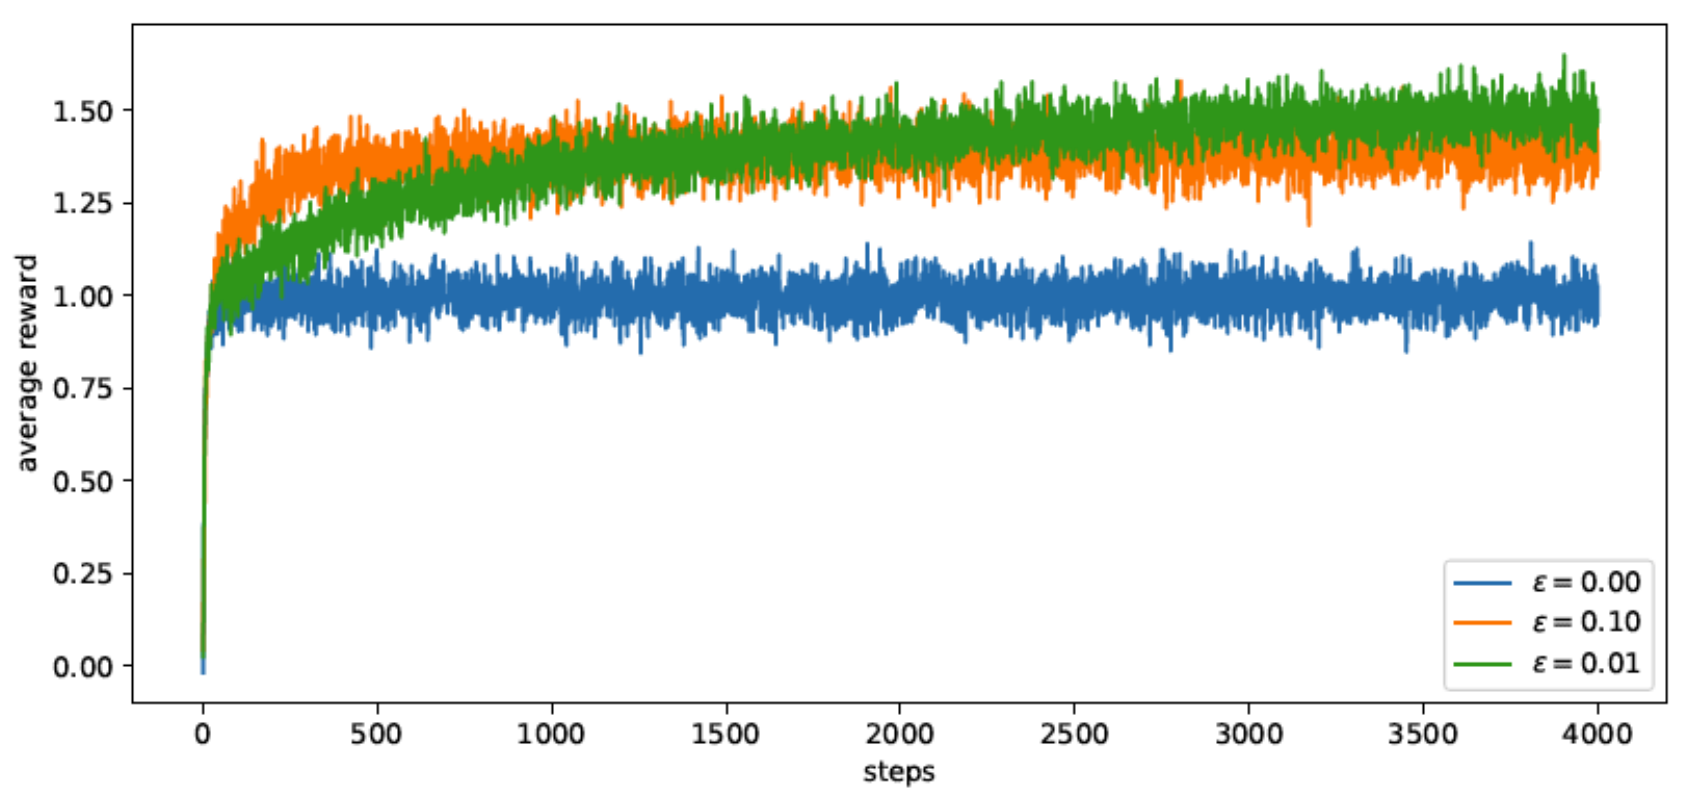

In [4]:
display(Image("./images/RL_epsilon_greedy.png", width=600))

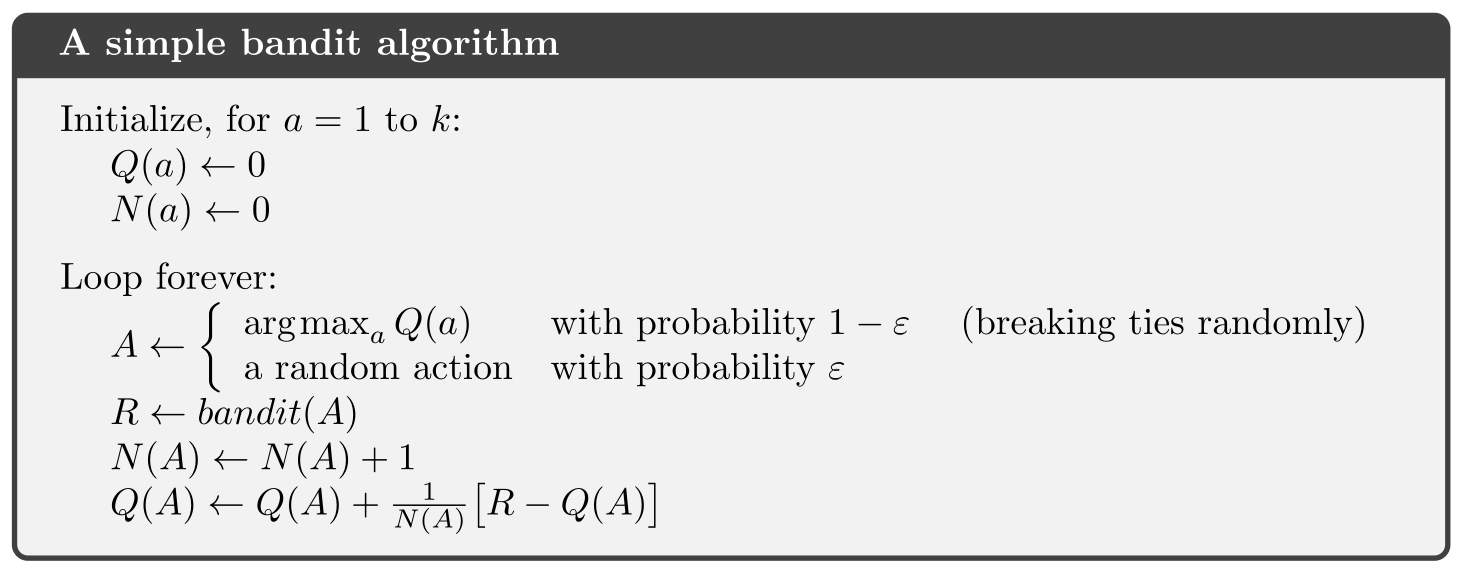

In [5]:
display(Image("./images/RL_bandit_algorithm.png", width=600))

### 1.2.2 OPTIMISTIC INITIAL VALUES

The Optimistic Initial Values policy is another approach to balance exploration and exploitation in the *k-armed bandit* problem.  
The idea is simple: **instead of starting with neutral estimates (e.g., $Q(a)=0$), we initialize all action-value estimates $Q(a)$ to optimistically high values**.

Because the agent starts with the belief that every action will yield a large reward, it will naturally explore different actions in order to verify this assumption.  
As data is collected, the estimated values are updated based on actual rewards, and the estimates for suboptimal actions decrease over time. Once the agent gains enough experience, it will converge toward exploiting the best action.

Thie policy has some limitations:
- Only drive early exploration: once the estimates converge, the method becomes purely greedy and exploration stops.  
- Not suited for non-stationary problems: if reward distributions change over time, the initial optimism cannot adapt.  
- Choice of optimism: it may not be clear what initial value is “optimistic enough” in some applications.  

### 1.2.3 UPPER CONFIDENCE BOUND (UCB) ACTION SELECTION

Unlike $\varepsilon$-greedy or optimistic initialization, UCB explicitly uses uncertainty in the value estimates to guide exploration.

The main intuition is “optimism in the face of uncertainty”. Even if we are uncertain about the true value of an action, we should act as if the most optimistic (plausible) outcome were true.

In other words, **the agent selects the action that could *potentially* yield the highest reward, given both its estimated value and its uncertainty**.

At each step $t$, the selected action is:
$$
A_t = \arg\max_a \left[ Q_t(a) + c \sqrt{\frac{\ln t}{N_t(a)}} \right]
$$

where:

- **$Q_t(a)$** → current estimated value of action *a*
- **$N_t(a)$** → number of times action *a* has been selected up to time *t*  
- **$t$** → total number of time steps (episodes) so far  
- **$c > 0$** → controls the degree of exploration (larger *c* = more exploration)  

Interpretation:
- The first term $Q_t(a)$ represents exploitation (how good we think the action is).  
- The second term $c \sqrt{\frac{\ln t}{N_t(a)}}$ represents exploration (how uncertain we are about the action).  
  - It decreases as $N_t(a)$ increases → the more we sample an action, the more confident we become.  
  - The $\ln t$ term ensures that even actions not selected for a while get reconsidered occasionally.  

Thus, UCB naturally balances exploration and exploitation: it favors actions that have high estimated rewards or high uncertainty, leading to efficient exploration without randomization.

### 1.2.4 GRADIENT BANDIT ALGOTIHMS (GBA)

In this method, **the agent maintains a preference value $H_t(a) \in \mathbb{R}$ for each action $a$**.  
- The larger the preference $H_t(a)$, the more likely the action is to be chosen.  
- These preferences are not directly interpretable as rewards — only their relative values matter.  

**To convert preferences into probabilities, GBA uses the softmax distribution**:

$$
\pi_t(a) = \frac{e^{H_t(a)}}{\sum_{b=1}^k e^{H_t(b)}}
$$

where $\pi_t(a)$ is the probability of selecting action $a$ at time $t$.  

Thus, actions with higher preferences are chosen more often, but all actions retain a nonzero probability of being explored.

#### UPDATE PROCEDURE 

The goal of GBA is to maximize the expected reward by performing gradient ascent on the policy’s performance measure.  
We start by initializing all preferences equally, e.g. $ H_1(a) = 0 \quad \forall a $.  
Then, after selecting action $A_t$ and receiving reward $R_t$, the preferences are updated as:

$$
H_{t+1}(a) =
\begin{cases}
H_t(A_t) + \alpha (R_t - \bar{R}_t) (1 - \pi_t(A_t)) & \text{for selected } A_t \\
H_t(a) - \alpha (R_t - \bar{R}_t) \pi_t(a) & \text{for all } a \neq A_t
\end{cases}
$$

where:
- **$\alpha$** is the step-size parameter (learning rate)  
- **$\bar{R}_t$** is the average of all rewards up to time $t$, serving as a baseline

If $R_t$ is greater than $\bar{R}_t$, the chosen action’s preference increases (and others decrease).  
If $R_t$ is less than $\bar{R}_t$, the preference for that action decreases.  

This baseline stabilizes learning and ensures that updates depend on relative performance, not absolute reward magnitude.

---

---

---

---

# 02 - 